<a href="https://colab.research.google.com/github/adityakharwar/Coursera/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
# Pandas is used to analyze data.
# NumPy is a Python library used for working with arrays.
# The array object in NumPy is called ndarray,
# it provides a lot of supporting functions that make working with ndarray very easy.
import pandas as pd
import numpy as np

In [192]:
# read_csv function is used to read or load data from CSV files.
df=pd.read_csv('/content/BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [193]:
df.set_index('Date',inplace=True)

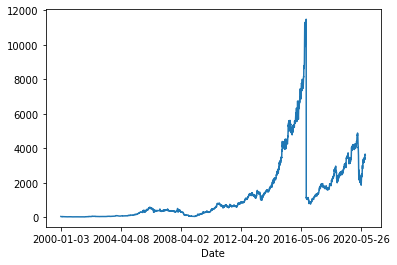

In [194]:
df['VWAP'].plot()

In [195]:
df.shape

(5070, 14)

In [196]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [197]:
df.dropna(inplace=True)

In [198]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [199]:
df.shape

(2291, 14)

In [200]:
data=df.copy()

In [201]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [202]:
#for checking the number of column in our dataset
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [203]:
lag_features=['High','Low','Volume', 'Turnover', 'Trades']
window1=3
window2=7

In [204]:
for feature in lag_features:
  data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
  data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [205]:
for feature in lag_features:
  data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
  data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [206]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [207]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [208]:
data.shape

(2291, 34)

In [209]:
# for checking the NAN value in our data 
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [210]:
df.dropna(inplace=True)

In [211]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [212]:
training_data=data[0:1000]
test_data=data[1000:]

In [225]:
training_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


ARIMA :- it is combination of ar+i+ma where, ar is auto regression , intergrity is i and moving model is ma. 

AUTO-ARIMA :- it is auto ml model of arima 

ARIMA is PACF, DIFF, ACF 
ACF :- Auto co-relation factor (X1= lamdaX2 + some eroor) some co-relation between data.

PACF :- partial autocorrelation function( direct co-relation) 

In [214]:
!pip install pmdarima

In [215]:
from pmdarima import auto_arima

In [216]:
import warnings
warnings.filterwarnings('ignore')

In [227]:
training_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [228]:
training_data.fillna(999, inplace=True)

In [ ]:
training_data.fillna(training_data.mean(), inplace=True)

In [229]:
training_data[:] = np.nan_to_num(training_data)

In [230]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=26557.301, Time=7.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26570.655, Time=4.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=26566.489, Time=4.52 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26566.836, Time=6.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=42003.660, Time=4.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=26557.061, Time=7.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=26565.684, Time=7.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26587.509, Time=6.08 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=26541.726, Time=8.38 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=26546.797, Time=7.48 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=26544.557, Time=8.71 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=26544.013, Time=8.42 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=26541.219, Time=9.21 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=26542.773, Time=10.44 sec
 ARIMA(1,0,5)(0,0,

In [231]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [234]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [235]:
test_data['Forecast_ARIMA']=forecast

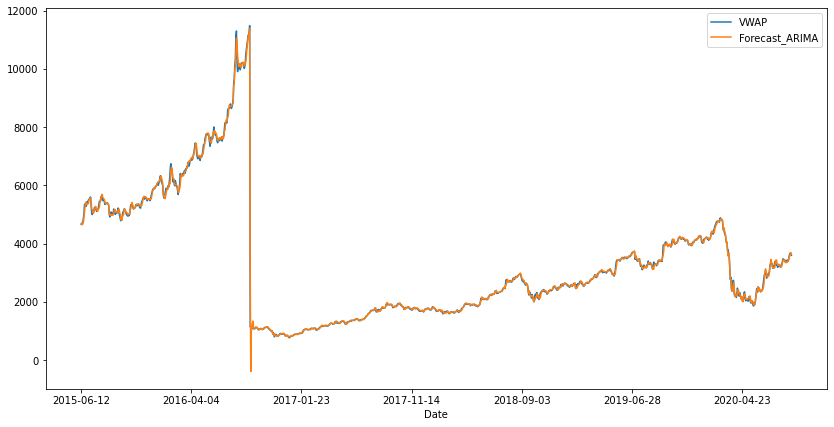

In [236]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [237]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [239]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

99.37538022415127

In [241]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

46.784857966152536